# Australian Weather Prediction
#**NOTEBOOK BY:**

# PS/MCS/21/0007
# PS/MCS/21/0009


---



---



---



---





## Task
Predicting next-day rain by training a classification model (Logistic Regression) on the target variable RainTomorrow.

# The dataset
- The dataset contains about 10 years of daily weather observations from many locations across Australia.
- RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is 
Yes if the rain for that day was 1mm or more.
- Date: the date of the observation
- Location: The common name of the location of the weather station.
- MinTemp: The minimum temperature in degree Celsius
- MaxTemp: The maximum temperature in degree Celsius
- Rainfall: The amount of rainfall recorded for the day in mm
- Evaporation: The so-called Class A pan evaporation(mm) in the 25 hours to 9am
- Sunshine: The number of hours of bright sunshine in the day
- WindGustDir: The direction of the strongest wind gust in the 24 hours to midnight
- WindGustSpeed: The speed (km/h) of the strongest wind gust in the 24 hours to midnight
- WindDir9am: Direction of the wind at 9am
- WindDir3pm: Direction of the wind at 3pm
- WindSpeed9am: Wind speed (km/hr) averaged over 10 minutes prior to 9amWindSpeed3pm: Wind speed (km/hr) averaged over 10 minutes prior to 3pm
- Humidity9am: Humidity (percent) at 9am
- Humidity3pm: Humidity (percent) at 3pm
- Pressure9am: Atmospheric pressure (hpa) reduced to mean sea level at 9am
- Pressure3pm: Atmospheric pressure(hpa) reduced to mean sea level at 3pm
- Cloud9am: Fraction of the sky obscured by cloud at 9am. This is measured in “oktas” which are unit of eighths.
- Cloud3pm: Fraction of the sky obscured by cloud at 3pm. This is measured in “oktas” which are unit of eighths.
- Temp9am: Temperature (degrees C) at 9am
- Temp3pm: Temperature (degrees C) at 3pm
- RainToday: Yes, if precipitation(mm) in the 24 hours to 9am exceeds 1mm, otherwise No

#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#diplays the output of plotting commands inline
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing and understanding the Dataset

In [ ]:
#Importing dataset to be used
path = "/content/drive/MyDrive/Colab Notebooks/ML-Australian-Weather-Prediction-main/weatherAUS.csv"
df = pd.read_csv(path)

In [ ]:
#Diisplay the first 10 rows
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


From above we can spot some missing values already

In [ ]:
# Cheking the Dimension of the dataset

print(f"Number of rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

Number of rows: 145460
Number of Columns: 23


*We can tell that we have a very large dataset with 145460 records under 23 categories* 

In [ ]:
#getting basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

- It can be seen from above that the dataset has only two data types: 16 as float64 and 7 as object
- also almost al the columns have missing values apart from the date and Location columns

# EDA and Data Wrangling (Cleaning and Feature Engineering)

### Missing Values

In [ ]:
#checking for null values
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

*From above it can be confirmed that only the Date and location columns have no null values*

In [ ]:
#looking for the percentage of missing values
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing}).sort_values(by="percent_missing", ascending=False)

In [ ]:
#Displaying the results
missing_value_df

,percent_missing
Sunshine,48.009762
Evaporation,43.166506
Cloud3pm,40.807095
Cloud9am,38.421559
Pressure9am,10.356799
Pressure3pm,10.331363
WindDir9am,7.263853
WindGustDir,7.098859
WindGustSpeed,7.055548
Humidity3pm,3.098446


### Handling Missing values

* Eventhough the Location and Date columns are void of null values we are going to dropped them since we are not interested in predicting whether it will be rainy in a particular location. 
* we are also going to drop all columns with more than 30% of null values because we have a quiet huge dataset and dropping them might not reduce my dataset much. Also dropping them will help us come out with a more robust model.

In [ ]:
#Dropping Date and Location Columns 
df.drop(["Date","Location"], axis=1, inplace=True)

In [ ]:
#Dropping all columns with more than 30% missing values
df.drop(["Sunshine","Evaporation","Cloud3pm","Cloud9am"],  axis=1, inplace=True)

In [ ]:
df.shape

(145460, 17)

### Dealing with Categorical missing values

In [ ]:
#counting number of categorical and numberic data
# cat =
print(df.dtypes.value_counts())

float64    12
object      5
dtype: int64


*we ave 12 numrical values and 5 cateorical values*

In [ ]:
#Describing the categorical data
df.describe(include='object')

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,135134,134894,141232,142199,142193
unique,16,16,16,2,2
top,W,N,SE,No,No
freq,9915,11758,10838,110319,110316


In [ ]:
#get the number of missing categorical values
missing_cat = [var for var in df.columns if df[var].isnull().mean()>0 
               and df[var].dtypes=='object']

In [ ]:
#count the number of missing categorical values
df[missing_cat].isnull().sum()

WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

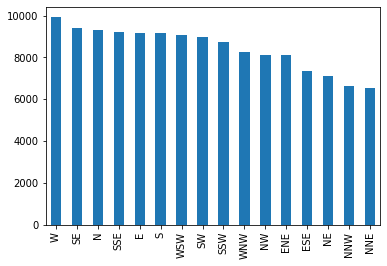

In [ ]:
df['WindGustDir'].value_counts().plot.bar()

In [ ]:
#Counting frequecy distribution for WindDirDir
df['WindGustDir'].value_counts()

W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64

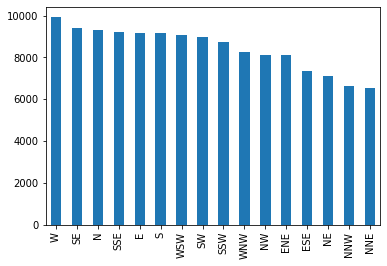

In [ ]:
#Ploting frequecy distribution for WindDirDir
df['WindGustDir'].value_counts().plot.bar()

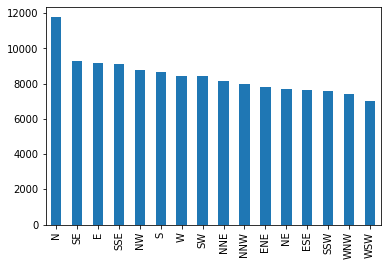

In [ ]:
#Ploting frequecy distribution for WindDir9am      
df['WindDir9am'].value_counts().plot.bar()

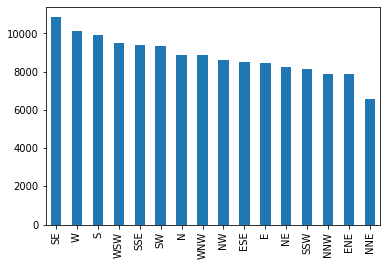

In [ ]:
#Ploting frequecy distribution for WindDir3pm
df['WindDir3pm'].value_counts().plot.bar()

from all the plots above we think it will be a good idea to replace the missing values with their respective modes. so we will proceed and do just that

In [ ]:
#Replacing missing missing categorical features with the mode
cat_feature_with_null = [feature for feature in missing_cat if df[feature].isnull().sum()]

for each_feature in cat_feature_with_null:
    mode_val= df[each_feature].mode()[0]
    df[each_feature].fillna(mode_val, inplace=True)

In [ ]:
# Checking if the null features are fully replaced
df[missing_cat].isnull().sum()

WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

### Dealing with Numerical missing values

In [ ]:
#Describing the numerical data
df.describe(exclude='object')

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,16.990631,21.68339
std,6.398495,7.119049,8.478060,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,40.200000,46.70000


It appears like replacing the missing values with the mean of the various features will be ideal 
- since most of them have their mean less than the 75th percentile and that
- won't introduce additional outliers into the dataset

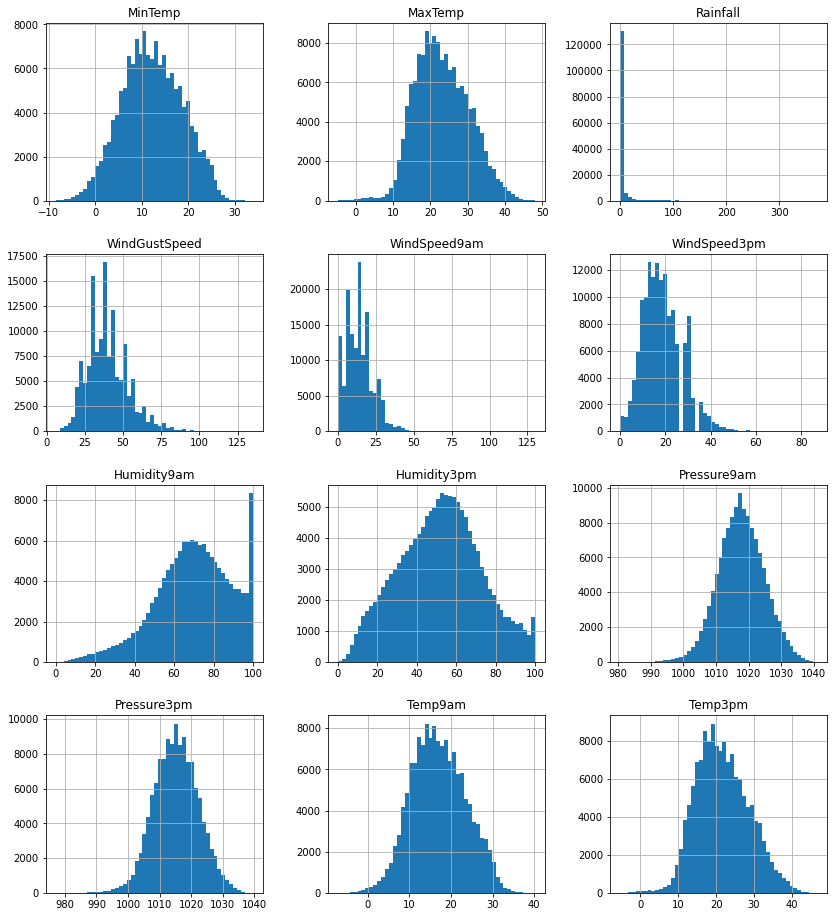

In [ ]:
#plotting a histogram to see the distribution of the features
df.hist(figsize=(14,16), bins=50)
plt.show()

All these features seems to be normally distributed with most values falling closer to the mean except the rainfall feature that looks a extremly skewed

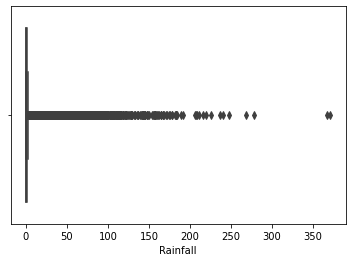

In [ ]:
#plotting a boxplot for the rainfall feature to observe tha behaviour
sns.boxplot(df.Rainfall)

*This shows that the the rainfall feature is positively skewed so we will consider replaceing the missing values here with the median and the rest of the features with the mean*

In [ ]:
#get the number of missing numerical values
missing_num = [num_col for num_col in df.columns if df[num_col].dtypes !='object']

In [ ]:
#count the number of missing numerical values
df[missing_num].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
dtype: int64

In [ ]:
#Replacing missing numerical values with mean and median
num_features_with_null = [feature for feature in missing_num if df[feature].isnull().sum()]
for feature in num_features_with_null:
    if df[feature].mean() < df[feature].quantile(.75):
        mean_value = df[feature].mean()
        df[feature].fillna(mean_value,inplace=True)
    else:
        median_value = df[feature].median()
        df[feature].fillna(median_value,inplace=True)
    
    

In [ ]:
#Checking if the values are fully replaced
df[missing_num].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
dtype: int64

### Exploring and Visualizing the Target Variable


No     113583
Yes     31877
Name: RainTomorrow, dtype: int64


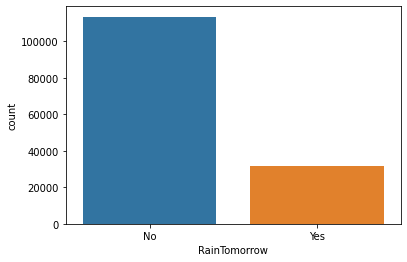

In [ ]:
#Checking and visualising the distribution of the target variable
print(df['RainTomorrow'].value_counts())
sns.countplot(data=df, x="RainTomorrow")
plt.show()

This shows that the target is imbalanced and the number of No's is far less than the Yes's. This might affect the model's performance. But we will leave it as it so since we don't want to alter the true reflection of the models prediction

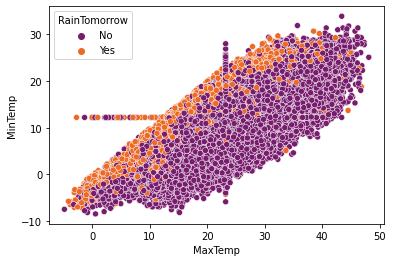

In [ ]:
#checking relationship between max and min temperature
sns.scatterplot(x = 'MaxTemp', y = 'MinTemp', hue = 'RainTomorrow' , palette = 'inferno',data = df)

This plot shows that there is a linear relationship between them: as the minTemp increase Maxtemp increases as well and that increases the tendency of raining tommorrow

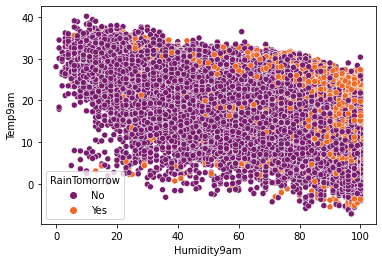

In [ ]:
#checking relationship between humidity9am and tem9m
sns.scatterplot(x = 'Humidity9am', y = 'Temp9am', hue = 'RainTomorrow' , palette = 'inferno',data = df)

from above plot we can tell that as humilty increase around 9am the probalility of rain tommorrow also increase and as the temperature also increase the probabilty of rain tommorrow decreases

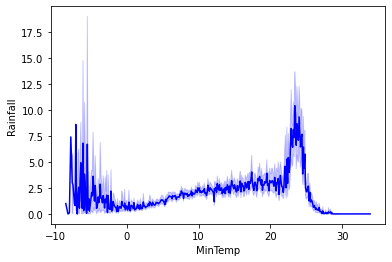

In [ ]:
#visualizing MinTemp against Rainfall
sns.lineplot(data=df,x='MinTemp',y='Rainfall',color='blue')

### Detecting and removing outliers

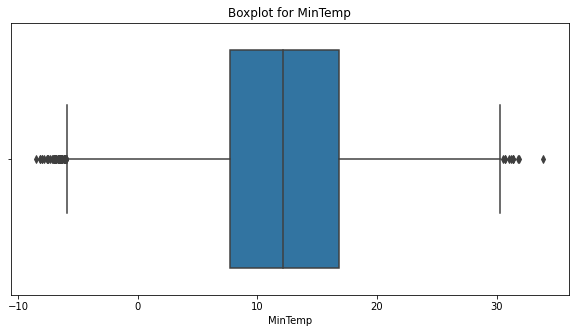

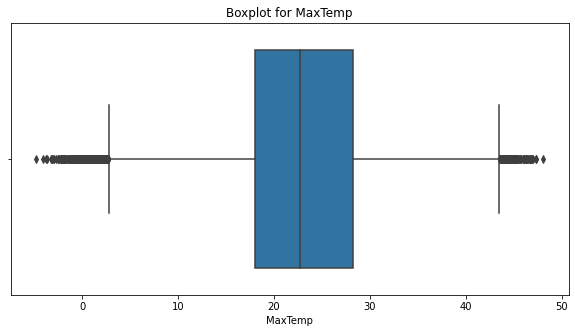

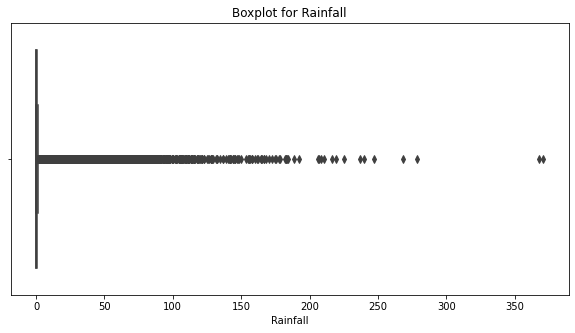

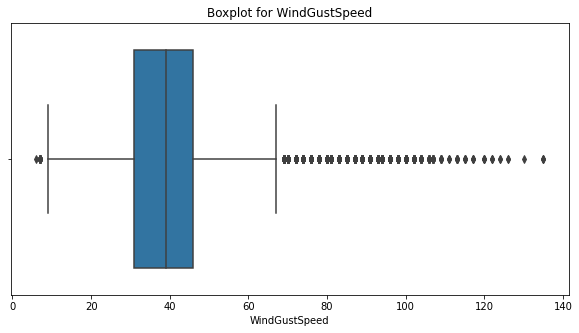

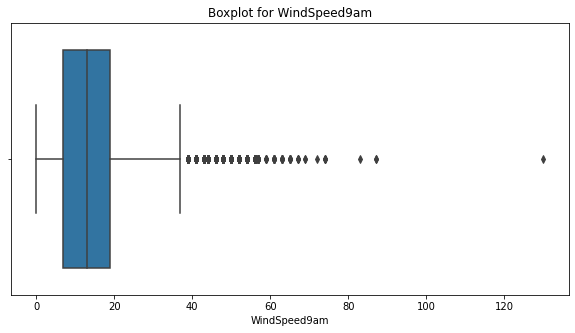

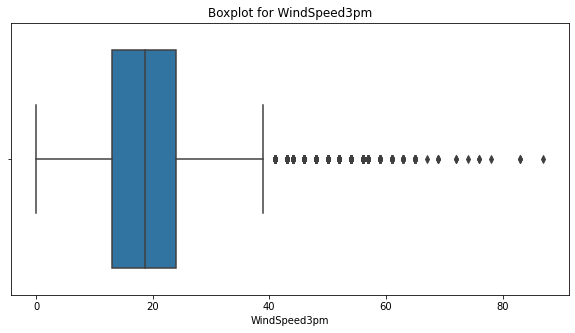

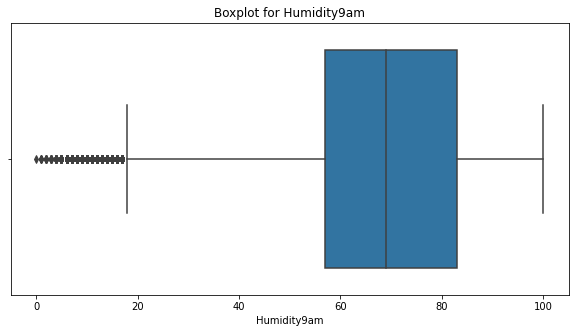

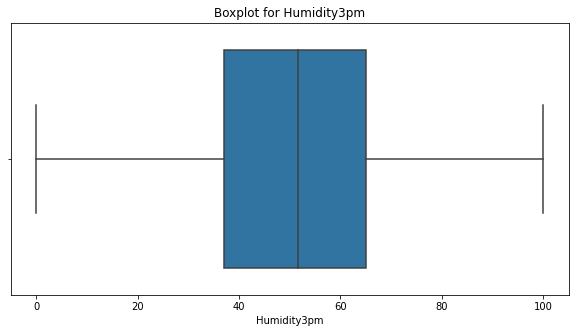

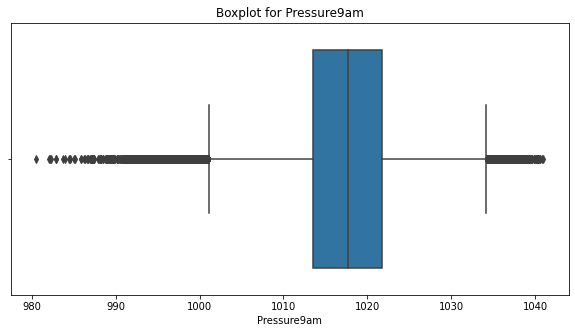

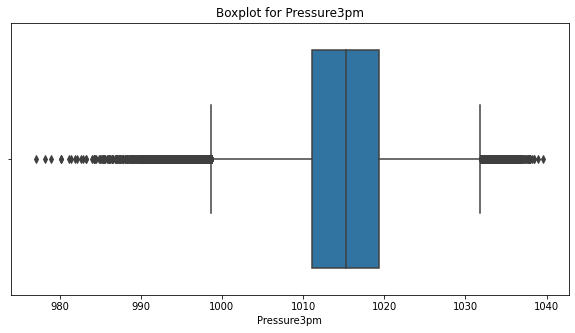

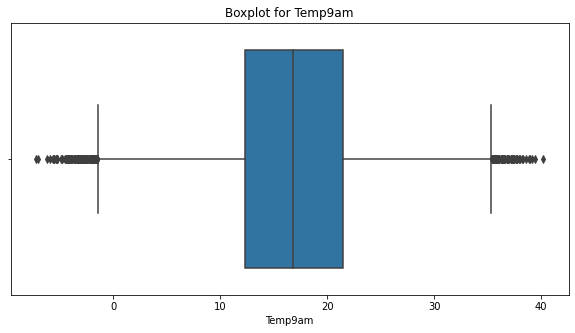

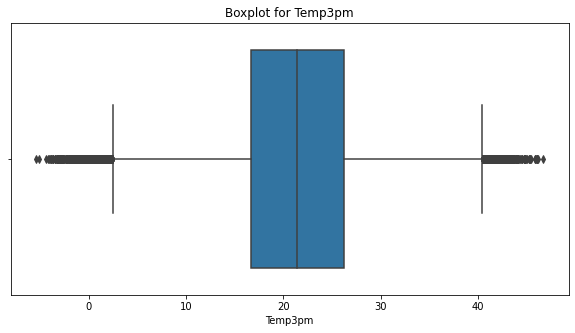

In [ ]:
#checking for outliers using Box Plot:
for feature in missing_num:
    plt.figure(figsize=(10,5))
    sns.boxplot(df[feature])
    plt.title("Boxplot for " + feature)

from above boxplot it appears all the features have outliers except **Humidity3pm**

In [ ]:
# create a list of features with outliers:
num_features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed','WindSpeed9am',
                          'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

In [ ]:
# Hanlding of outliers 
#Since most of my skewed we are going to remove outliers from the features unsing the IQR approach:
for feature in num_features_with_outliers:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit,feature] = lower_limit
    df.loc[df[feature]>upper_limit,feature] = upper_limit

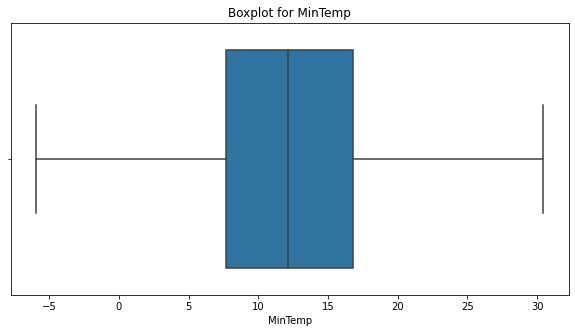

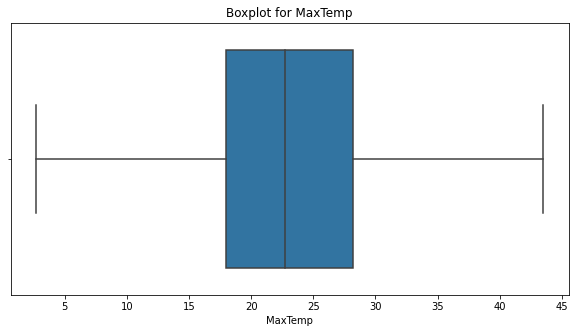

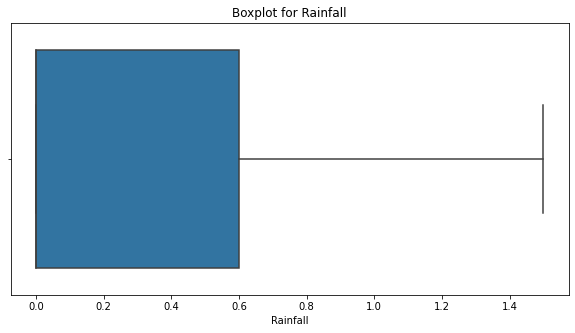

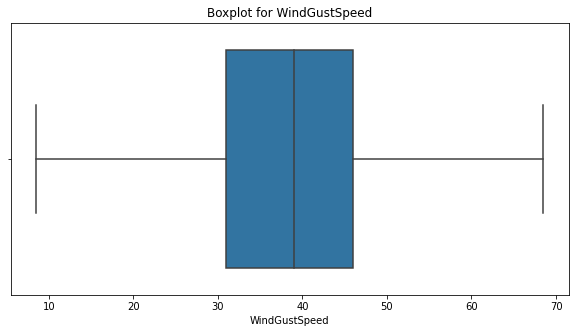

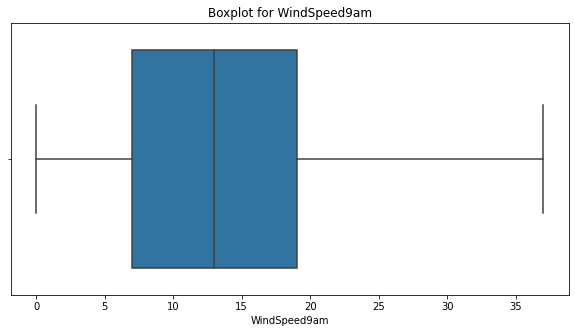

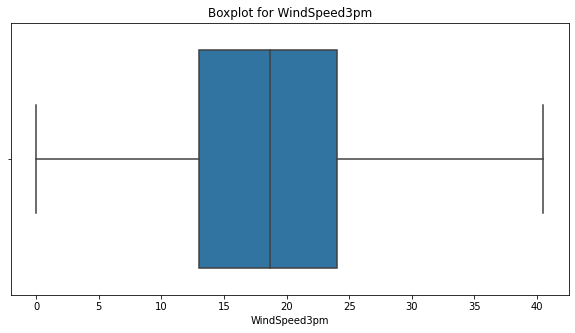

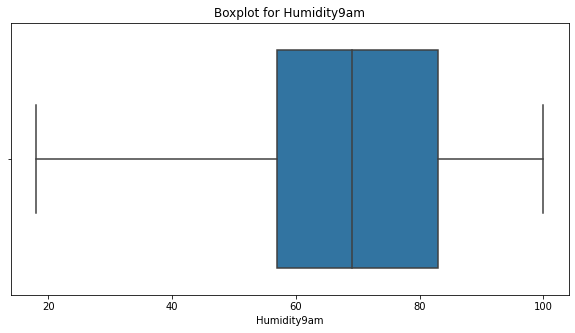

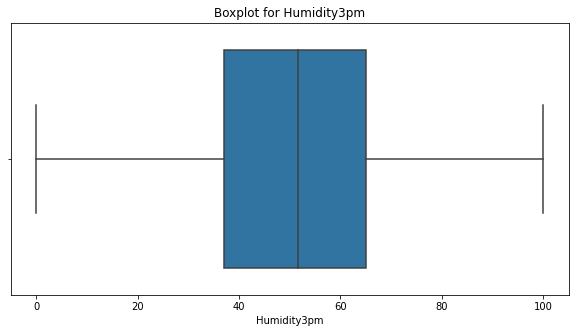

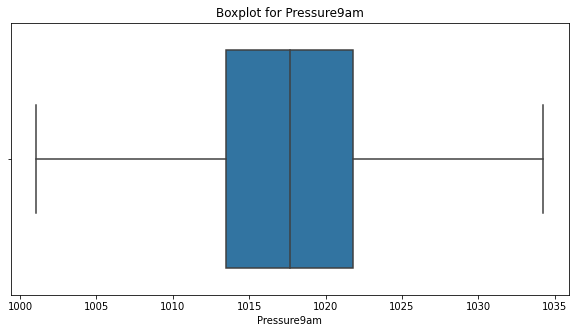

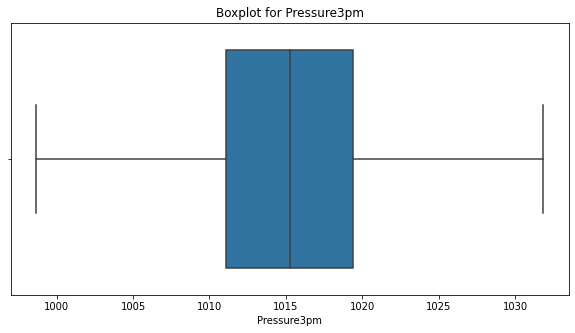

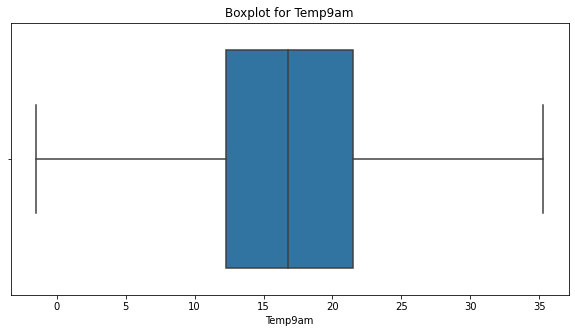

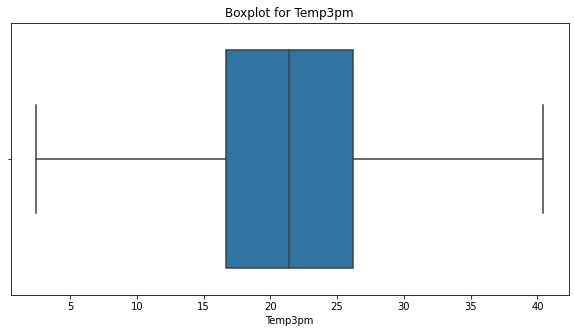

In [ ]:
#Verifying if outliers is delt with
for feature in missing_num:
    plt.figure(figsize=(10,5))
    sns.boxplot(df[feature])
    plt.title("Boxplot for " + feature)

Now we can confirm that our features are now void of outliers

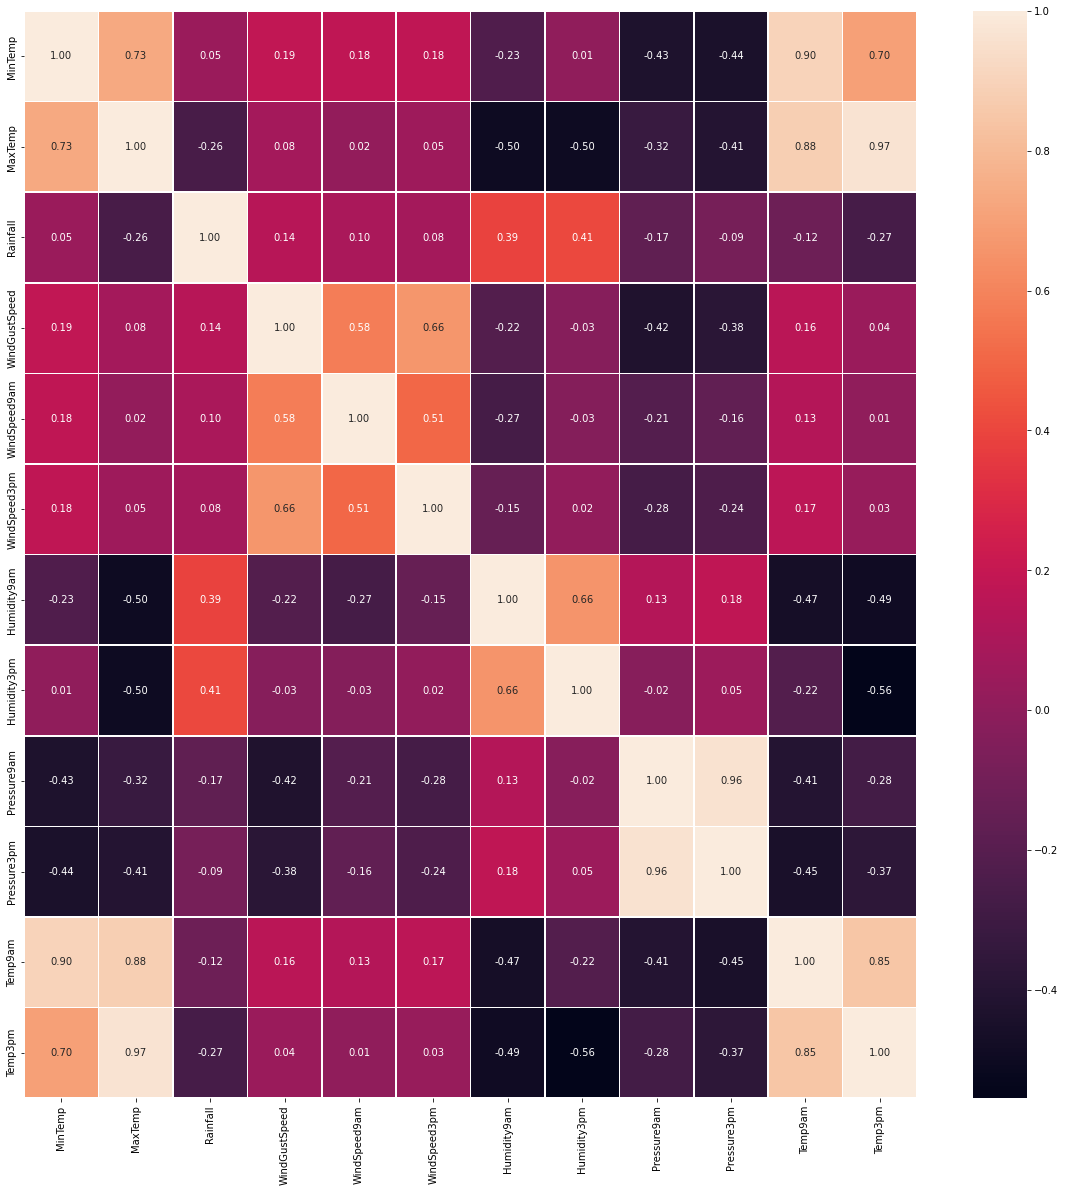

In [ ]:
#Checking how the features are correlated with each other 
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),linewidths=0.5,annot=True,fmt=".2f")


*This heatmap shows how the features correlate with each other*
- there is a very strong positive correlation between pressure3pm and pressure9am that's 0.96
- and temp3pm and maxTemp with 0.97
- ...

### Encoding Categorical features so that the Logistic Regression algorithm to handle

In [ ]:
#Encoding Categorical Features using replace method:
df['RainToday'].replace({'No':0,'Yes':1},inplace = True)
df['RainTomorrow'].replace({'No':0,'Yes':1},inplace = True)

In [ ]:
df.sample(20)

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
10049,13.1,21.4,0.6,WSW,31.00000,WSW,ESE,20.0,15.0,60.0,48.0,1031.20000,1028.600000,18.5,20.90,0,0
48538,14.6,25.4,0.0,ENE,39.00000,ESE,ENE,13.0,20.0,74.0,55.0,1019.40000,1018.100000,19.0,23.80,0,0
129083,11.4,18.8,1.5,NW,61.00000,NW,NW,19.0,30.0,85.0,63.0,1007.50000,1005.600000,12.5,17.70,1,1
28168,13.2,28.7,0.0,NE,24.00000,N,NNE,0.0,15.0,79.0,64.0,1011.40000,1008.400000,19.9,26.20,0,0
34652,14.9,21.6,1.5,S,67.00000,SSW,SW,20.0,15.0,96.0,69.0,1005.60000,1005.900000,15.5,20.70,1,1
58595,19.8,29.7,0.0,SE,52.00000,ENE,SE,9.0,13.0,78.0,53.0,1016.90000,1015.200000,22.7,27.80,0,0
124528,13.8,23.1,1.5,SW,50.00000,W,SW,22.0,28.0,62.0,51.0,1017.64994,1015.255889,18.6,20.70,1,0
73170,7.1,26.7,0.0,W,30.00000,WSW,W,15.0,15.0,68.0,31.0,1017.30000,1013.000000,14.3,24.90,0,0
132597,7.2,20.7,0.0,NNW,39.00000,N,ESE,19.0,15.0,65.0,46.0,1023.10000,1017.800000,11.4,18.20,0,0
34143,10.7,22.1,0.0,W,68.50000,WNW,W,28.0,35.0,40.0,21.0,1014.90000,1011.100000,15.9,21.30,0,0


In [ ]:
#enconding cateorical variables using one Hot encoding
cat_col = ['WindGustDir','WindDir9am','WindDir3pm']

df = pd.get_dummies(df, columns=cat_col)

In [ ]:
df.sample(5)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
34964,20.9,23.3,0.0,56.00000,9.0,24.000000,77.0,77.000000,1012.2,1011.4,...,0,0,0,0,0,1,0,0,0,0
111250,9.0,17.6,0.8,40.03523,7.0,18.662657,90.0,51.539116,1024.7,1022.9,...,0,0,0,1,0,0,0,0,0,0
87840,21.5,28.9,0.0,35.00000,20.0,24.000000,63.0,54.000000,1019.0,1015.2,...,0,0,0,0,0,0,0,0,0,0
33892,21.0,26.9,0.0,44.00000,15.0,28.000000,62.0,57.000000,1021.6,1019.2,...,0,0,0,0,0,0,0,0,0,0
88907,21.6,31.5,0.0,35.00000,9.0,20.000000,63.0,68.000000,1014.8,1012.5,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Checking the dimension after encoding
df.shape

(145460, 62)

Now we have 62 features after enconding all categorical variables

#### Splitting data into Independent Features and Dependent Features:

In [ ]:
# making X as Independent or Input features
X = df.drop(['RainTomorrow'],axis=1)
# making y as Dependent or target label
y = df['RainTomorrow']

In [ ]:
X.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,1,0,0,0,0,0,0,0,0


### Splitting Data into Training and Testing Set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [ ]:
print("Length of Training Data: {}".format(len(X_train)))
print("Length of Testing Data: {}".format(len(X_test)))

Length of Training Data: 109095
Length of Testing Data: 36365


### Feature Standardization 

In [ ]:
#Since the features are measured from different scales, we are going to scale all the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
#Save the Scaler object to Standardize Real Time Data feeded by users for prediction
#with open('scaler.pkl', 'wb') as file:
 # pickle.dump(scaler, file)

we will only standardize the numerical features, the categorical was encoded usgin the one hot encoding 

In [ ]:
# from sklearn import preprocessing
# num_feature = [var for var in df.columns if df[var].dtype !='object']
# for col in num_feature:
#     df[col] = preprocessing.scale(df[col])
    
# df.head()

### Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
# set X to all features
X = df.loc[:,df.columns!='RainTomorrow']
# set y to our target RainTomorrow
y = df.RainTomorrow
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

### Testing our model

In [ ]:
#Model Testing:
y_pred = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.8415234428708923


##### Checking for Overfitting and Under Fitting:

In [ ]:
print("Train Data Score: {}".format(logreg.score(X_train, y_train)))
print("Test Data Score: {}".format(logreg.score(X_test, y_test)))

Train Data Score: 0.8411292909849214
Test Data Score: 0.8415234428708923


The Accuracy Score of Training and Testing set Data is almost equal. So, there is no question of Underfitting and Over Fitting. And model this model can generally perform well for new unseen data.

### Evaluating our Model

- we are going to be using K_fold cross validation, which is a more accurate method of evaluating our model since it uses each all of our data to build and test our model.
- We will be splitting our data into 5 folds.
- For each fold we produce an evaluation metric, in this case we will be using accuracy to evaluate our model, which is essentially the percentage of correct predictions. 
- We will take the mean of the 5 scores to evaluate our model.

In [ ]:
# import relevant functions
from numpy import mean
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# split data into 5 folds and shuffle to avoid bias
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(logreg, X, y, scoring='accuracy', cv=cv)
average_score = mean(scores)
print('Overall Accuracy:', average_score)

Overall Accuracy: 0.8375017186855492


We can establish that our model has a good accuracy of 0.8372... , that is logistic regression model can get approximately 84% of predictions correct, which is a god prediction score.


In [ ]:
# confusion Matrix:
print("Confusion Matrix:")
print("\n",confusion_matrix(y_test,y_pred))

Confusion Matrix:

 [[26892  1435]
 [ 4328  3710]]


from this cionfussion matrix we can tell that

- the Correct Predictions : TP+TN = 26899+3644 = 30543
- the Incorrect Predictions: FP+FN = 1428+4394 = 5822
This proves that we have greater predictions to be correct


In [ ]:
# Create a classification report for the model.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     28327
           1       0.72      0.46      0.56      8038

    accuracy                           0.84     36365
   macro avg       0.79      0.71      0.73     36365
weighted avg       0.83      0.84      0.83     36365



we can say deduce from the above report that 
- from the recall we see that only only 45% of the data were predicted to be positive which is poor
- and only 72% were correct that is from the precision.
- we also see the the metrics for rain tommorrow(1) was calculated from 8038 data and a total of 28327 were used to calculate for the not rain tommorrow(0) 
- the f1 score also gives us a harmonic mean of 56% and 90% for both positive and negative prediction
- our precision score was also 84% that is we were able to predict 84% as correct 

In [ ]:
# predicting probabilities:
y_pred_logreg_proba = logreg.predict_proba(X_test)

In [ ]:
# Finding True Positive Rate(tpr), False Positive Rate(fpr), threshold values to plot ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_proba[:,1])

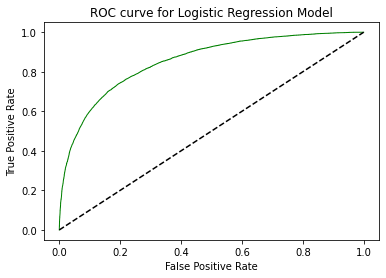

In [ ]:
# Plotting ROC curve:
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
# finding ROC-AUC score:
from sklearn.metrics import roc_auc_score
print('ROC AUC Scores: {}'.format(roc_auc_score(y_test, y_pred)))

ROC AUC Scores: 0.7054496094657096


*This ROC AUC score means that the prediction has 70% probality of distinguishing between positive and negative classes.*

## Finding whether model performance can be improved using Cross Validation Score:

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.84211009 0.83936019 0.8408268  0.84188093 0.84128512]


In [ ]:
print('Average cross-validation score: {}'.format(scores.mean()))

Average cross-validation score: 0.8410926256932033


The mean accuracy score of cross validation is almost the same like original model accuracy score which is 0.8372. So, the accuracy of model may not be improved massively using Cross-validation.

# THE END
## THANK YOU :)